We develop analyses for circuit composition. 
In another notebook we have composed analyses using components provided in out analysis
framework **DMT**, However, *composing* an analyses is restricted by the availability of 
components that are assembled to define an analysis. A freer approach is to base an analysis
on a base analysis-class and override its methods. Here we use this *inheriting* approach
to build some customized circuit composition analyses.

In [2]:
import numpy as np
import pandas as pd
from dmt.model.interface import Interface
from dmt.tk.plotting import Bars
from neuro_dmt.data import rat
from neuro_dmt.analysis.circuit import BrainCircuitAnalysis
from neuro_dmt.models.bluebrain.circuit.model import BlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.adapter import BlueBrainCircuitAdapter
from neuro_dmt import terminology

class CellDensityAnalysis:
    """
    Analyze the cell density in a circuit.
    """
    
    class AdapterInterface(Interface):
        """
        Define the methods required to run this analysis,
        which must be provided by an adapter of the circuit model to be analyzed.
        """
        def get_label(self, circuit_model):
            """
            Get a label for the circuit_model
            """
            raise NotImplementedError
            
        def get_cell_density(self, 
                circuit_model,
                layer):
            """
            Get cell density for the circuit model for the given layer.
            """
            raise NotImplementedError
            
            
    def __call__(self, circuit_model, adapter):
        """
        Run the analysis.
        """
        adapter = self.AdapterInterface.implementation(adapter)
        layers = ["L1", "L2", "L3", "L4", "L5", "L6"]
        model_measurement = pd.DataFrame({
            "cell_density": [
                adapter.get_cell_density(
                    circuit_model,
                    layer=layer) 
                for layer in layers],
            "layer": layers}
        ).set_index(
            "layer"
        )
        reference_data = {
        }
        plotter = Bars(
            xvar="layer",
            xlabel="Layer",
            yvar="cell_density",
            ylabel="Cell Density",
            gvar="dataset")
        return plotter.get_figure({
            adapter.get_label(circuit_model): model_measurement,
            "DeFelipe2017": rat.defelipe2017.summary_measurement.samples(1000),
            "DeFelipe2014": rat.defelipe2014.summary_measurement.samples(1000),
            "meyer2010": rat.meyer2010.samples(1000)
        })

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


In [3]:
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity
from neuro_dmt.models.bluebrain.circuit.mock.circuit\
    import MockBlueBrainCircuitModel
mock_circuit_model = MockBlueBrainCircuitModel(
    circuit_composition,
    circuit_connectivity)

In [4]:
adapter = BlueBrainCircuitAdapter()

cell_density_analysis = CellDensityAnalysis()

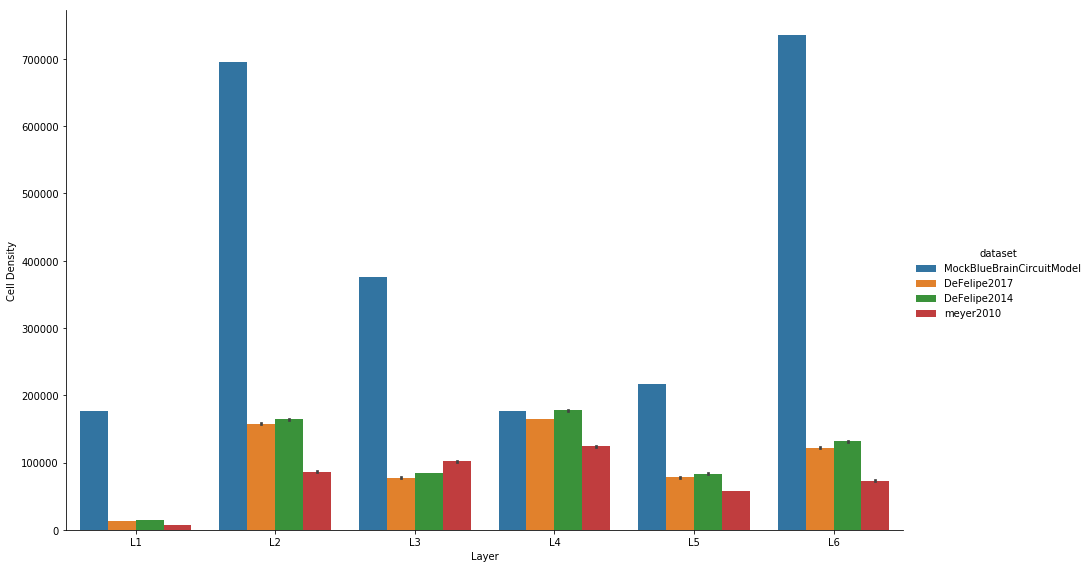

In [5]:
cell_density_analysis(mock_circuit_model, adapter)

In [ ]:
layers = ["L1", "L2", "L3", "L4", "L5", "L6"]
pd.DataFrame(
    {"cell_density": [
        adapter.get_cell_density(
            mock_circuit_model,
            layer=layer) 
        for layer in layers]},
        index = layers
    )

We could add a reporter to our analysis.

In [ ]:
from neuro_dmt.analysis.reporting import\
    CircuitAnalysisReport,\
    CheetahReporter

class CellDensityAnalysis:
    """
    Analyze the cell density in a circuit.
    """
    
    class AdapterInterface(Interface):
        """
        Define the methods required to run this analysis,
        which must be provided by an adapter of the circuit model to be analyzed.
        """
        def get_label(self, circuit_model):
            """
            Get a label for the circuit_model
            """
            raise NotImplementedError
            
        def get_cell_density(self, 
                circuit_model,
                layer):
            """
            Get cell density for the circuit model for the given layer.
            """
            raise NotImplementedError
            
        @property
        def caption_cell_density_measurement_figure(self):
            """
            Provide a caption that you would want to see in the figure
            analyzing cell density by layer using your adapter.
            """
            raise NotImplementedError
            
        @property
        def introduction_cell_density_analysis_report(self):
            """Provide an introduction for the analysis report."""
            raise NotImplementedError
            
        @property
        def method_cell_density_measurement(self):
            """
            Descibe how cell density is measured in the circuit model by the
            adapter. This description will be used as a figure caption.
            """
            raise NotImplementedError
            
        def results_cell_density_analysis(self,
                measurement_statistics,
                reference_data):
            """
            A description of the analysis' result presented as an 
            object providing `measurement_statistics`.
            
            Arguments
            =====================
            measurement_statistics :: pandas.DataFrame< columns ??? columns>
            reference_data :: Mapping 
            ~                   data :: pandas.DataFrame,
            ~                   citation :: provenance of the reference data
            """
            raise NotImplementedError
            
        def discussion_cell_density_analysis_report(self, 
                measurement_statistics,
                reference_data):
            """
            A description of the analysis' result presented as an 
            object providing `measurement_statistics`.
            
            Arguments
            =====================
            measurement_statistics :: pandas.DataFrame< columns ??? columns>
            reference_data :: Mapping 
            ~                   data :: pandas.DataFrame,
            ~                   citation :: provenance of the reference data
            """
            raise NotImplementedError
            
    def statistical_test(self, measurement, **reference_data):
        """
        Arguments
        =================
        measurement :: pandas.DataFrame
        reference_data :: kwargs<name_dataset -> pandas.DataFrame
        """
        raise NotImplementedError
        
    def __call__(self, circuit_model, adapter):
        """
        Run the analysis.
        """
        adapter =\
            self.AdapterInterface.implementation(adapter)
        layers =[
            "L1", "L2", "L3", "L4", "L5", "L6"]
        model_measurement =\
            pd.DataFrame({
                "cell_density": [
                    adapter.get_cell_density(circuit_model, layer=layer) 
                    for layer in layers],
                "layer": layers}
            ).set_index("layer")
        plotter =\
            Bars(
                xvar="layer",
                xlabel="Layer",
                yvar="cell_density",
                ylabel="Cell Density",
                gvar="dataset")
        reporter =\
            CheetahReporter(
                path_output_folder=os.path.join(
                    os.getcwd(),
                    "validations"))
        stats =\
            self.statistical_test(
                model_measurement,
                rat.defelipe2017.data)
        return reporter.post(
            CircuitAnalysisReport(
                phenomenon = "Cell Density",
                measurement = model_measurement,
                figures = plotter.get_figure({
                    data = adapter.get_label(circuit_model): model_measurement,
                    "DeFelipe2017": rat.defelipe2017.summary_measurement.samples(1000),
                    "DeFelipe2014": rat.defelipe2014.summary_measurement.samples(1000),
                    "meyer2010": rat.meyer2010.samples(1000)},
                    caption = adapter.caption_cell_density_measurement_figure),
                introduction = adapter.introduction_cell_density_analysis_report,
                methods = adapter.method_cell_density_measurement,
                results = adapter.results_cell_density_analysis(
                    self.statistical_test(model_measurement, rat.defelipe2017.data),
                    {"data": rat.defelipe2017.data,
                      "author": rat.defelipe2017.author,
                      "citation": rat.defelipe2017.citation}),
                discussion = adapter.discussion_cell_density_analysis_report(
                    {"data": rat.defelipe2017.data,
                      "author": rat.defelipe2017.author,
                      "citation": rat.defelipe2017.citation})))